# Ehrlich - Corpus Analyses


## Setup

Uncomment and run once

In [ ]:
#!pip install nltk mplcursors tqdm langdetect langcodes language_data seaborn
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
%matplotlib inline

In [ ]:
from dotenv import load_dotenv
load_dotenv()


## Occurrence

### Lehrbücher

In [ ]:
from scripts.occurrence_within_work import plot_occurrences, create_corpus
regex_list = [r'\bEhrlichs?\b', r'\b[Ll]ebend[^ ]+ Rechts?\b']
corpus = create_corpus("CORPORA/rsoz-lehrbuecher")
plt1 = plot_occurrences(corpus, regex_list)
plt1.savefig('docs/ehrlich-rsoz-lehrbuecher.png', dpi=300, bbox_inches='tight')
plt1.show()

### Zeitschrift für Rechtssoziologie

Analyzing article corpus:   0%|          | 0/725 [00:00<?, ?it/s]

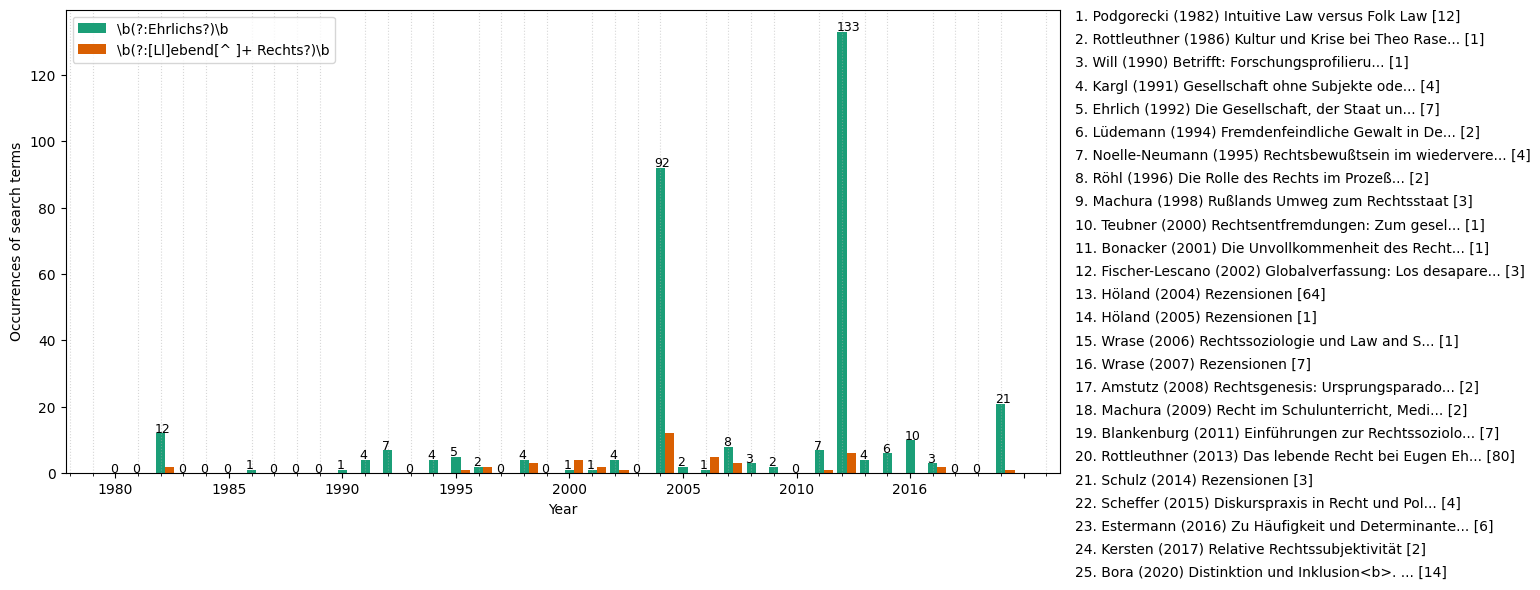

In [2]:
from scripts.utils import create_corpus, get_corpus_dir
from scripts.occurrence_by_year import plot_occurrences, save_occurrences
regex_list = [r'\b(?:Ehrlichs?)\b', r'\b(?:[Ll]ebend[^ ]+ Rechts?)\b']
corpus = create_corpus(get_corpus_dir('FULLTEXTS/ZFRSOZ/zfrsoz-txt'))
corpus = corpus.loc[corpus['author'] != 'Smaus'] # manual correction of false positive
save_occurrences(corpus, regex_list, "data/zfrsoz-articles-occurrences.xlsx")
plt2 = plot_occurrences(corpus, regex_list)
plt2.savefig('docs/zfrsoz-ehrlich-1980-2020', dpi=300, bbox_inches='tight')
plt2.show()

### Journal of Law and Society

Analyzing article corpus:   0%|          | 0/1650 [00:00<?, ?it/s]

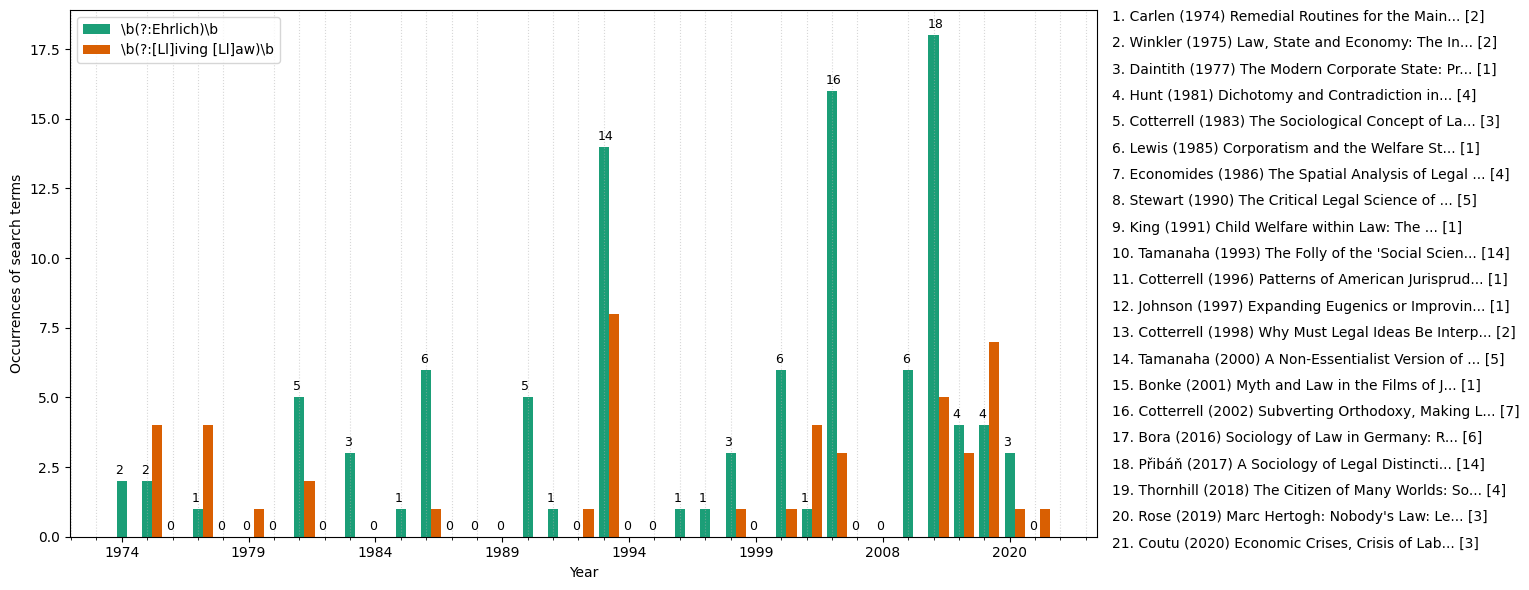

In [3]:
from scripts.utils import create_corpus, get_corpus_dir, DOICache
from scripts.occurrence_by_year import plot_occurrences, save_occurrences
regex_list = [r'\b(?:Ehrlich)\b', r'\b(?:[Ll]iving [Ll]aw)\b']
doi_cache = DOICache("data/jls-doi-to-year.csv")
corpus = create_corpus(get_corpus_dir('FULLTEXTS/JLS/jls-txt'))
corpus = corpus.loc[corpus['author'] != 'Veljanovski'] # manual correction of false positive
corpus = corpus.loc[corpus['author'] != 'Ogus'] # manual correction of false positive
corpus['author'] = corpus['author'].replace("Tamanha","Tamanaha") # error in DOI metadata
save_occurrences(corpus, regex_list, "data/jls-articles-occurrences.xlsx")
plt3 = plot_occurrences(corpus, regex_list)
plt3.savefig('docs/jls-ehrlich-1980-2020', dpi=300, bbox_inches='tight')
plt3.show()

## Co-occurrence

### Lehrbücher

Compute co-occurences

In [1]:
from dotenv import load_dotenv; load_dotenv()
from scripts.utils import create_corpus
from scripts.cooccurrence import find_cooccurring_words, filter_df
import os, re
regex = r'\bEhrlichs?\b'
corpus_dir = os.getenv('CORPUS_BASE_DIR') + "/CORPORA/rsoz-lehrbuecher"
df = filter_df(create_corpus(corpus_dir), regex)
cooccurring_words, global_cooccurring_words = find_cooccurring_words(
    df, regex,
    default_language='german',
    ignore=r'Eugen|[Vv]gl|\bff\b|Rechts?|\b.{1,2}\b|Aufl\w*|\bsei\b|Anm\w*|Abschnitt|[Mm]uss\w*|[Aa]\. ?a. ?o\.')
# cache results
import pickle
with open("cache/df.pickle", "wb") as file:
    pickle.dump(df, file)
with open("cache/cooccurring_words.pickle", "wb") as file:
    pickle.dump(cooccurring_words, file)
with open("cache/global_cooccurring_words.pickle", "wb") as file:
    pickle.dump(global_cooccurring_words, file)

print("Done.")

Analyzing article corpus:   0%|          | 0/19 [00:00<?, ?it/s]

Tokenizing and stemming...:   0%|          | 0/18 [00:00<?, ?it/s]

Analyzing co-occurring words...:   0%|          | 0/18 [00:00<?, ?it/s]

Resume here to plot a heatmap of the cached data

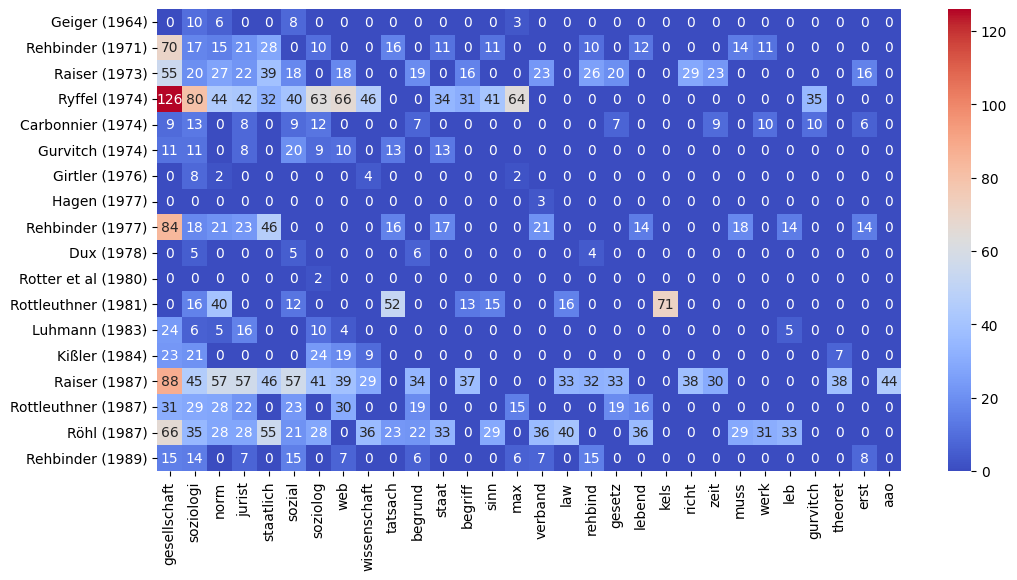

In [2]:
import pickle
with open("cache/df.pickle", "rb") as file:
    df = pickle.load(file)
with open("cache/cooccurring_words.pickle", "rb") as file:
    cooccurring_words = pickle.load(file)
with open("cache/global_cooccurring_words.pickle", "rb") as file:
    global_cooccurring_words = pickle.load(file)
from scripts.cooccurrence import filter_counters, create_heatmap
filtered_counters = filter_counters(cooccurring_words, global_cooccurring_words,max_doc=20, max_global=300)
create_heatmap(df, filtered_counters, max_words=30, file="docs/ehrlich-lehrbuecher-co-occurrence.png")

### JLS

Analyzing article corpus:   0%|          | 0/1650 [00:00<?, ?it/s]

Tokenizing and stemming...:   0%|          | 0/11 [00:00<?, ?it/s]

Analyzing co-occurring words...:   0%|          | 0/11 [00:00<?, ?it/s]

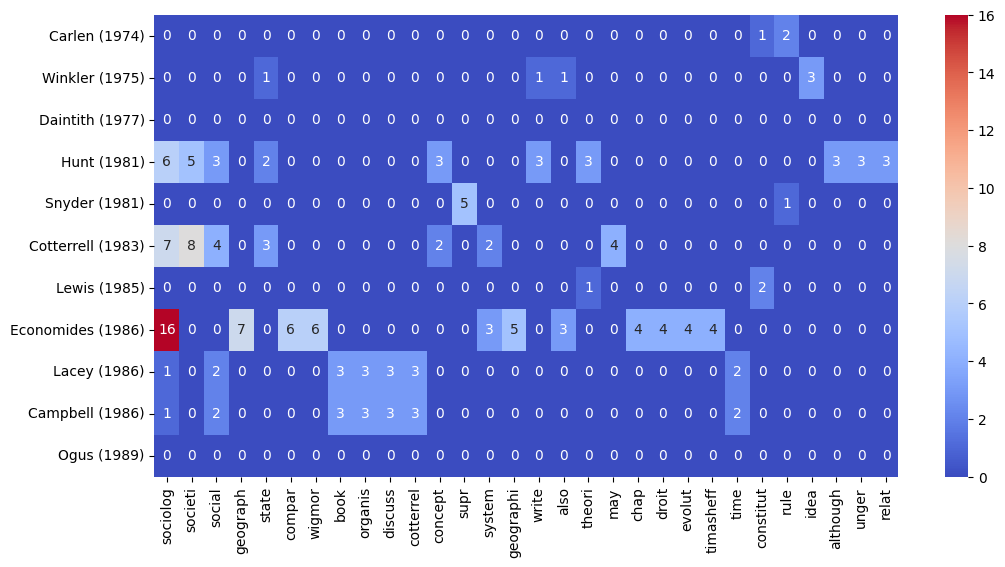

In [3]:
from dotenv import load_dotenv; load_dotenv()
from scripts.utils import create_corpus
from scripts.cooccurrence import find_cooccurring_words, filter_df,  filter_counters, create_heatmap
import os
regex = r'\bEhrlich?\b'
corpus_dir = os.getenv('CORPUS_BASE_DIR') + '/FULLTEXTS/JLS/jls-txt'
df = filter_df(create_corpus(corpus_dir), regex)
df = df.loc[df['year'] < 1990]
df = df.loc[df['author'] != 'Veljanovski'] # cites another Ehrlich
cooccurring_words, global_cooccurring_words = find_cooccurring_words(
    df, regex, default_language='english',
    ignore=r'Eugen|\b.{1,2}\b|[Ll]aw|[Ll]egal|[Ss]ee|[Rr]ev|ptl|han|and|[eE]ds')
filtered_counters = filter_counters(cooccurring_words, global_cooccurring_words,max_doc=20, max_global=300)
create_heatmap(df, filtered_counters, max_words=30)

## Word Cloud

In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))
